## Get size class distribution

This script imports aggregated output and then displays size class distribution for a subset of ensemble members.

The subset can be determined from the aggreagated data.

In [1]:
import pandas as pd
import glob
import os
import netCDF4 as nc4
import sys
sys.path.append('/glade/u/home/adamhb/Earth-System-Model-Tools')
import esm_tools
import re
import numpy as np
from matplotlib import pyplot as plt
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
np.set_printoptions(threshold=1000)
import seaborn as sns

In [8]:
esm_tools.inst_to_tag([4])[0]

'0004'

In [2]:
path_to_aggreagated_data = '/glade/work/adamhb/processed_output/CZ2_equilibrium_700yrs_042524_01_-17e2acb6a_FATES-1449c787/equilibrium_700yrs_042524_metrics_and_params.csv'
case_name = 'CZ2_equilibrium_700yrs_042524_01_-17e2acb6a_FATES-1449c787'
years = [1617,1619] # Which years to check size class distribution

### Use aggregated data to get tags to make size class distribution figures

This is used as another check to see if we want to discard some ensemble members

In [3]:
df = pd.read_csv(path_to_aggreagated_data)
tag_numbers = esm_tools.inst_to_tag(np.array(df.loc[df['promising'] == True]['inst_tag']))
print(tag_numbers)

['0011', '0024', '0048', '0054', '0064', '0065', '0067', '0092']


### Get data to make size class distribution figures

In [4]:
scls_data = esm_tools.get_size_class_distribution(case_name,
                                                  years,
                                                  tag_numbers=tag_numbers)

-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 


## Functions

In [5]:
def get_scls_dist_one_inst(df,tag):
    df = df.copy()
    df = df.loc[df['inst_tag'] == tag]
    df['Group'] = "fates"
    obs = pd.read_csv('/glade/u/home/adamhb/scls.csv')
    df = pd.concat([df,obs],axis = 0)
    bins = [5, 20, 40, 60, 80, 100, 120, float('inf')]
    labels = ['5-20', '20-40', '40-60', '60-80', '80-100', '100-120', '>120']
    # Create a new column for binned size classes
    df['new_size_class'] = pd.cut(df['size_class'], bins=bins, labels=labels, right=False, include_lowest=True)
    df = df.groupby(['Group','new_size_class']).sum()['density'].reset_index()
    sns.barplot(x='new_size_class', y='density', hue='Group', data=df, linewidth=2.5)

    # Adding titles and labels
    plt.title('Ensemble member {}'.format(tag))
    plt.xlabel('Size Class [cm dbh]')
    plt.ylabel('Density [N ha-1]')
    #plt.ylim(0, 100)
    
    # Adding a legend if not automatically included
    plt.legend(title='Mod vs. Obs')
    
    # Display the plot
    plt.show()

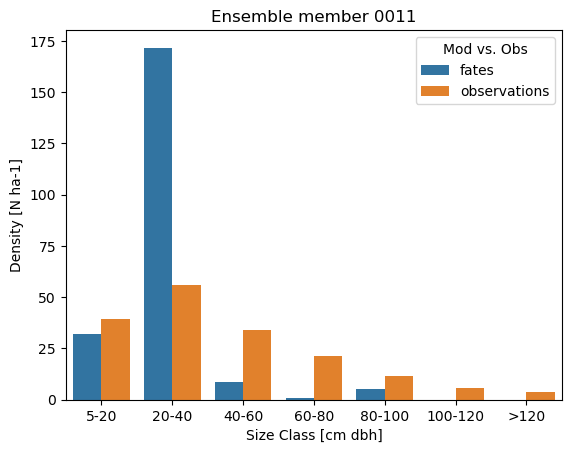

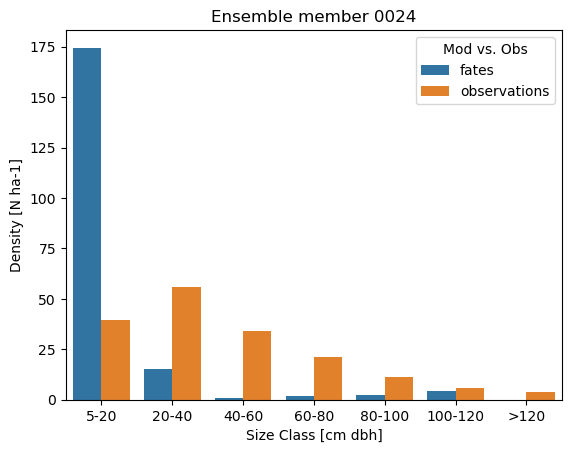

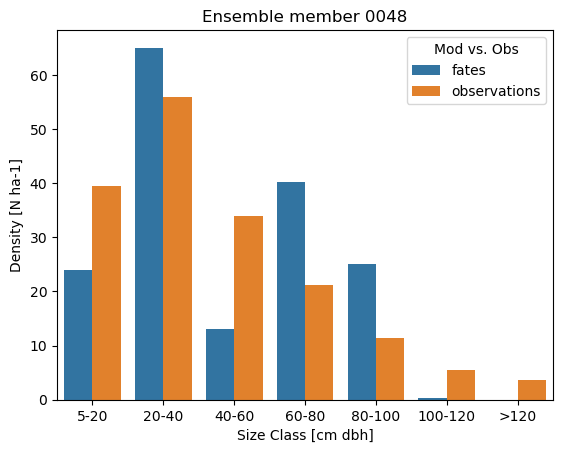

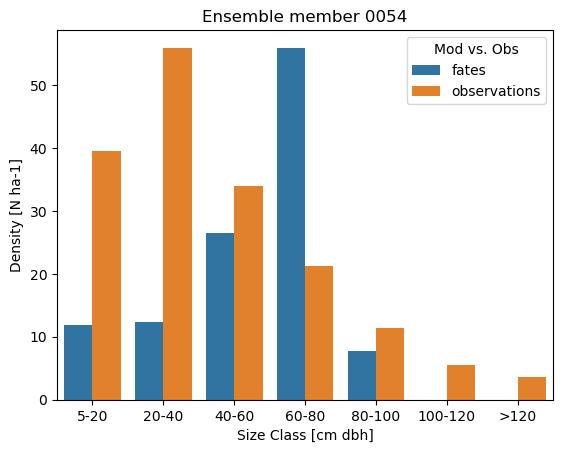

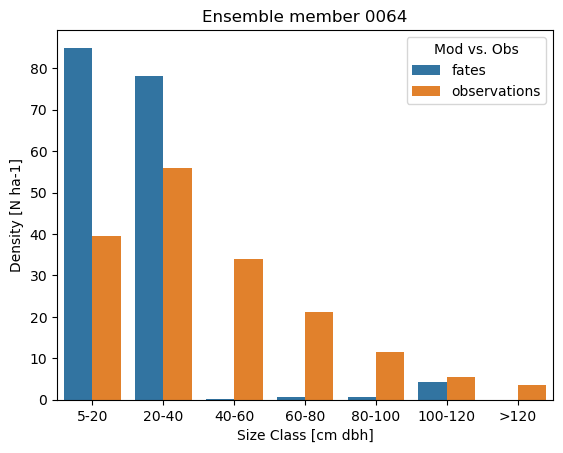

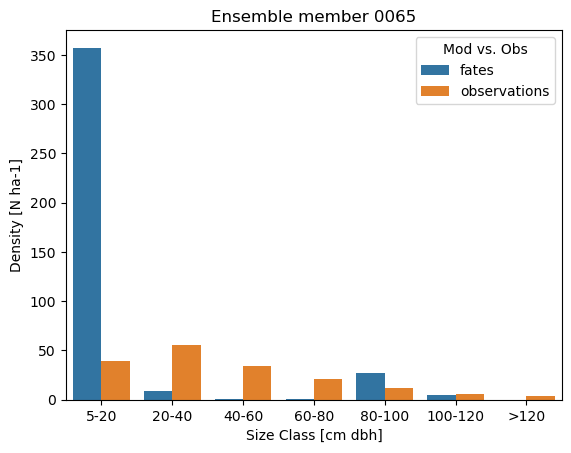

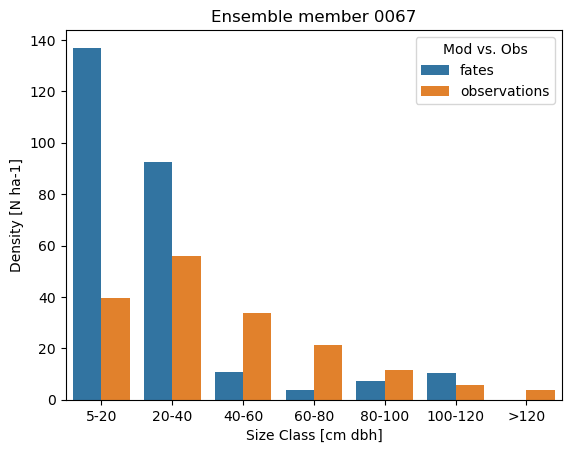

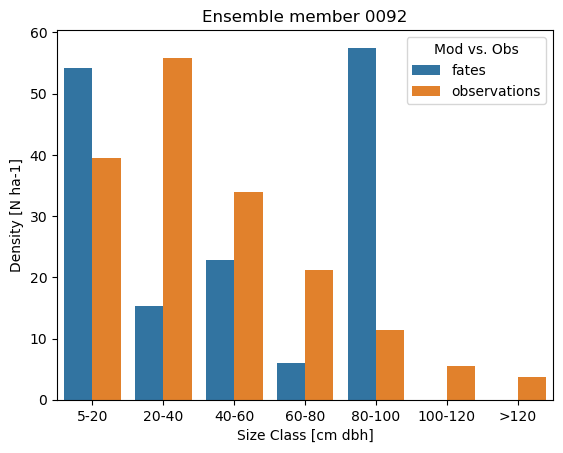

In [6]:
for tag in tag_numbers: 
    get_scls_dist_one_inst(scls_data,tag)

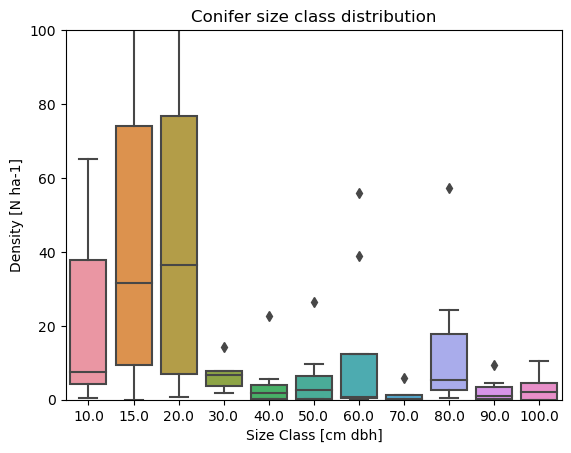

In [12]:
sns.boxplot(x='size_class', y='density', data=scls_data)

# Adding titles and labels (optional)
plt.title('Conifer size class distribution')
plt.xlabel('Size Class [cm dbh]')
plt.ylabel('Density [N ha-1]')
plt.ylim(0, 100)

# Display the plot
plt.show()